# R kernel

In [1]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(rstatix)
library(ggrepel)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
library(CellChat)
})

In [2]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.08,0,0.08,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.08,0,0.08, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=6),
    panel.border = element_rect(linewidth=0.25,color="black"),
    panel.grid = element_blank()
)
}

In [3]:
Fib_subtype_colors = c(
    "FB_COL11A1+" ="#2CA02CFF",
    "FB_COL18A1+" = "#ff9d3a",
    "FB_COL23A1+" = "#ff73b6",
    "FB_SFRP1+" = '#774898', 
    "FB_SFRP2+" =  '#00a8b5',
    "FB_SFRP4+" = "#f9e858",
    "FB_ASPN+" = "#d83034",
    "FB_Inflam" = "#c701ff",
    "FB_IFN" = "#008dff",
    "FB_Cycling" ='#BED754'
)
Endo_subtype_colors = c(
    "VEC_CCL14+"="#003a7d",
    "VEC_IFN"="#5e4c5f",
    "Perivascular"='#b7c9f2', 
    "LEC"='#e62a76'
)
subtype_color = c(Fib_subtype_colors, Endo_subtype_colors)

Fib_subtype_order = c("FB_COL11A1+","FB_COL18A1+","FB_COL23A1+",                       
                       "FB_SFRP1+","FB_SFRP2+","FB_SFRP4+",
                       "FB_ASPN+",
                       "FB_Inflam",
                       "FB_IFN",
                       "FB_Cycling")
Endo_subtype_order = c("VEC_CCL14+","VEC_IFN","Perivascular","LEC")
subtype_order = c(Fib_subtype_order,Endo_subtype_order)

## Fig.6B

In [4]:
stromal_metadata = read.csv('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/stromal_nonTLS_TLS_metadata.csv', head=T)

In [5]:
stromal_metadata = subset(stromal_metadata, group != 'HC' & subtype != "Smooth muscle cells")
stromal_metadata$subtype = factor(stromal_metadata$subtype, levels = subtype_order)

In [6]:
all_stats <- stromal_metadata %>%
  group_by(TLS_region,subtype) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)
all_stats$subtype = factor(all_stats$subtype, levels=subtype_order)

`summarise()` has grouped output by 'TLS_region'. You can override using the
`.groups` argument.


png 
  2

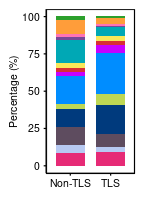

In [24]:
All_plot = ggplot(all_stats,aes(x=TLS_region,y=percentage,fill=subtype)) +
    geom_bar(stat = "identity",width=0.7) +
    labs(x="",y="Percentage (%)",fill="Cell type") +
    scale_fill_manual(values=subtype_color) +
    mytheme() +
    theme(#axis.text.x=element_text(size=6,color='black', angle=45, hjust=1,vjust=1),
        legend.position='none',
         )
options(repr.plot.width= 1.2,repr.plot.height = 1.8)
All_plot

pdf("../../figures/stromal_nonTLS_TLS_barplot.pdf",w=1.2,h=1.8)
All_plot
dev.off()

## Fig.6C

In [188]:
ring_density = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/stromal_density_TLS_ring.csv",head=T)

In [189]:
ring_density$subtype = factor(ring_density$subtype, levels = subtype_order)
ring_density$ring = ring_density$ring*0.5

In [190]:
VEC_CCL14 = subset(ring_density, subtype == 'VEC_CCL14+')

In [191]:
compares = list(c("20","40"),c("20","60"),c("20","80"),c("20","100"),c("40","60"),c("40","80"),c("40","100"),c("60","80"),c("60","100"),c("80","100"))

Warning message in wilcox.test.default(c(271.934679382791, 96.1433666370455, 336.002870221321, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(97.7370158694494, 0, 260.903089744523, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(97.7370158694494, 0, 260.903089744523, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(97.7370158694494, 0, 260.903089744523, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(65.1946016869476, 24.3639480960288, 243.158158005927, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(65.1946016869476, 24.3639480960288, 243.158158005927, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(88.8954989471529, 0, 198.285293410532, :
“cannot compute exact p-value with ties”
Warning message:
“Removed 18 rows containing missing values or values outside the scale range


png 
  2

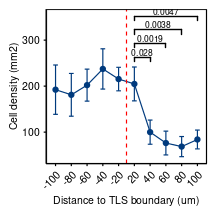

In [194]:
plot = ggline(VEC_CCL14, x="ring", y="subtype_density", add=c("mean_se"),  error.plot = "errorbar",
            add.params = list(size = 1, width = 0.3), color='subtype', shape=19, stroke=NA, size=0.25, #palette = celltype_color,
            point.size = 0.3, nrow=2) +  #scales="free_x",facet.by = "subtype",
geom_vline(xintercept=5.5, lwd=0.25, lty=2, color='red') + 
stat_compare_means(comparisons = compares, label.y = c(240, 270, 300, 330) ,label = "p.format",,size = 1.7,tip.length = 0.02,hide.ns = TRUE) +
labs(x='Distance to TLS boundary (um)', y='Cell density (mm2)') +
scale_color_manual(values="#003a7d") +
mytheme() +
theme(axis.text.x=element_text(size=6,color="black",angle=45,hjust=1,vjust=1),
    legend.position = "none"
)

options(repr.plot.width =1.8,repr.plot.height =1.8)
plot

pdf("../../figures/TLS_VEC_CCL14_ring_density.pdf",w=1.8,h=1.6)
plot
dev.off()

## Fig.6E

In [232]:
Fib_dist = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Fib_Endo/Fibroblasts_cell2BM_distance.csv",head=T)
Fib_dist = Fib_dist[Fib_dist$group != 'HC',]
Fib_dist$Depth_bin = factor(Fib_dist$Depth_bin, levels=c('0-250', '250-500', '500-750', '750-1000', '1000-1250','1250-1500','>1500'))
FB_IFN_dist = Fib_dist[Fib_dist$celltype=='FB_IFN',]

In [238]:
test_result = FB_IFN_dist %>%
  as.data.frame() %>%
  setNames(make.names(names(.), TRUE)) %>%
  dunn_test(proportion ~ Depth_bin)
test_result$p.format = sprintf("%.3f", test_result$p.adj)
test_result = test_result[test_result$p.adj < 0.05, ]

In [251]:
test_result = test_result %>% mutate(y.position = c(16,18,20,22,7))

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's fill values.”


png 
  2

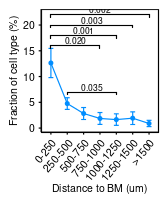

In [253]:
plot = ggline(FB_IFN_dist, x="Depth_bin", y="proportion", add=c("mean_se"),  error.plot = "errorbar", 
            add.params = list(size = 1, width = 0.3),color = "celltype", palette = Fib_subtype_colors, shape=20, stroke=NA, size=0.25,
            point.size = 0.5, nrow=1) + 
stat_pvalue_manual(test_result, label = "p.format", label.size=1.7, hide.ns=T, bracket.size=0.25, tip.length = 0.02) +
labs(x='Distance to BM (um)', y='Fraction of cell type (%)') +
mytheme() +
theme(axis.text.x=element_text(size=6,color="black",angle=50,hjust=1,vjust=1),
    legend.position = "none"
)

options(repr.plot.width =1.4,repr.plot.height =1.7)
plot

pdf("../../figures/FB_IFN_cell2BM_distance.pdf",w=1.4,h=1.7)
plot
dev.off()

## Fig.6G

In [215]:
Endo_metadata = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Fib_Endo/Endo_gene_set_score_metadata.csv",head=T, row.names=1)
Endo_metadata = Endo_metadata[,colnames(Endo_metadata) %in% c('ADHESION','subtype')]
Endo_metadata$subtype = factor(Endo_metadata$subtype, levels = Endo_subtype_order)

Fib_metadata = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Fib_Endo/Fib_gene_set_score.csv",head=T, row.names=1)
Fib_metadata = Fib_metadata[,colnames(Fib_metadata) %in% c('CHEMOTAXIS','subtype')]
Fib_metadata$subtype = factor(Fib_metadata$subtype, levels = Fib_subtype_order)


In [227]:
Endo_plot = ggplot(Endo_metadata, aes(x=subtype,y=ADHESION,fill=subtype)) +
    geom_violin(scale='width', lwd=0.25,draw_quantiles = 0.5,trim = TRUE) + 
    geom_hline(yintercept=median(Endo_metadata$ADHESION), color = "black", lwd=0.25, linetype = "dashed") +
    labs(x="",y='Gene set score') +
    facetted_pos_scales(y = list(scale_y_continuous(limits = c(-1, 3), n.breaks = 5))) +
    scale_fill_manual(values=Endo_subtype_colors) +
    mytheme() + 
    theme(legend.position = 'none',
        axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=5.5),
        strip.text.y.right = element_text(size=5, margin = margin(0,0.08,0,0.08, "cm")),
        strip.background=element_rect(size=0.25, color='black', fill="white"))

In [226]:
Fib_plot = ggplot(Fib_metadata, aes(x=subtype,y=CHEMOTAXIS,fill=subtype)) +
    geom_violin(scale='width', lwd=0.25,draw_quantiles = 0.5,trim = TRUE) + 
    geom_hline(yintercept=median(Fib_metadata$CHEMOTAXIS), color = "black", lwd=0.25, linetype = "dashed") +
    labs(x="",y='Gene set score') +
    facetted_pos_scales(y = list(scale_y_continuous(limits = c(-0.5, 1.5), n.breaks = 5))) +
    scale_fill_manual(values=Fib_subtype_colors) +
    mytheme() + 
    theme(legend.position = 'none',
        axis.text.x=element_text(angle=45, hjust=1, vjust=1, size=5.5),
        strip.text.y.right = element_text(size=5, margin = margin(0,0.08,0,0.08, "cm")),
        strip.background=element_rect(size=0.25, color='black', fill="white"))

png 
  2

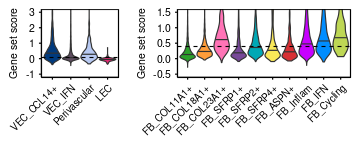

In [228]:
options(repr.plot.width =3,repr.plot.height = 1.35)
plot_grid(Endo_plot, Fib_plot, rel_widths = c(1.1,2), align='h')

pdf("../../figures/Fib_Endo_gene_score_vlnplot.pdf", w=3, h=1.35)
plot_grid(Endo_plot, Fib_plot, rel_widths = c(1.1,2), align='h')
dev.off()

## Fig.6H

In [124]:
communication_result_FI = read.csv("LE_Merge_7LR_communication_FibEndo2Immune_dist200_subtype.csv",head=T)
pvalue_result_FI = read.csv("LE_Merge_7LR_communication_FibEndo2Immune_dist200_subtype_pvalue.csv",head=T)

communication_result_IF = read.csv("LE_Merge_7LR_communication_Immune2FibEndo_dist200_subtype.csv",head=T)
pvalue_result_IF = read.csv("LE_Merge_7LR_communication_Immune2FibEndo_dist200_subtype_pvalue.csv",head=T)

In [125]:
write.csv(communication_result_FI, "LE_Merge_7LR_communication_FibEndo2Immune_dist200_subtype.csv", row.names=F)
write.csv(communication_result_IF, "LE_Merge_7LR_communication_Immune2FibEndo_dist200_subtype.csv", row.names=F)

write.csv(pvalue_result_FI, "LE_Merge_7LR_communication_FibEndo2Immune_dist200_subtype_pvalue.csv", row.names=F)
write.csv(pvalue_result_IF, "LE_Merge_7LR_communication_Immune2FibEndo_dist200_subtype_pvalue.csv", row.names=F)

In [126]:
communication_result_FI$variable = gsub("B_ATM","B_ABC", communication_result_FI$variable)
communication_result_FI$variable = gsub("B_GC","B_preGC", communication_result_FI$variable)

communication_result_IF$index = gsub("B_ATM","B_ABC", communication_result_IF$index)
communication_result_IF$index = gsub("B_GC","B_preGC", communication_result_IF$index)

pvalue_result_FI$variable = gsub("B_ATM","B_ABC", pvalue_result_FI$variable)
pvalue_result_FI$variable = gsub("B_GC","B_preGC", pvalue_result_FI$variable)

pvalue_result_IF$index = gsub("B_ATM","B_ABC", pvalue_result_IF$index)
pvalue_result_IF$index = gsub("B_GC","B_preGC", pvalue_result_IF$index)

In [127]:
# Endo to Immune
Immune_celltypes = c('Tn',"Tm", "Treg", "Tph/Tfh", "Bn", "B_ABC", "B_preGC")
Endo_comm = communication_result_FI[communication_result_FI$index %in% Endo_subtype_order,]
Endo_comm = Endo_comm[Endo_comm$variable %in% Immune_celltypes,]
Endo_comm = subset(Endo_comm, value > 1e-07)
Endo_comm$value[Endo_comm$value > 0.00001] = 0.00001
names(Endo_comm)[colnames(Endo_comm)=='value'] = 'comm'

Endo_comm_pvalue = pvalue_result_FI[pvalue_result_FI$index %in% Endo_subtype_order,]
Endo_comm_pvalue = Endo_comm_pvalue[Endo_comm_pvalue$variable %in% Immune_celltypes,]
names(Endo_comm_pvalue)[colnames(Endo_comm_pvalue)=='value'] = 'pvalue'

Endo_comm_select = subset(Endo_comm, L_R == 'ICAM1-SPN' | L_R == 'SELE-CD44' | L_R == 'ICAM1-ITGAL' )
Endo_comm_select_pvalue = subset(Endo_comm_pvalue, L_R == 'ICAM1-SPN' | L_R == 'SELE-CD44' | L_R == 'ICAM1-ITGAL')

Endo_merge_1 = merge(Endo_comm_select, Endo_comm_select_pvalue, by=c("index",'variable','L_R'))
Endo_merge_1 = subset(Endo_merge_1, pvalue < 0.05)
Endo_merge_1$sign = ifelse(Endo_merge_1$pvalue < 0.01,3,2)
Endo_merge_1$index = factor(Endo_merge_1$index, levels=Endo_subtype_order)
Endo_merge_1$variable = factor(Endo_merge_1$variable, levels=Immune_celltypes)

In [128]:
Immune_celltypes = c("Tn","Tm", "Treg", "Tph/Tfh", "Bn", "B_ABC", "B_preGC") 
Endo_comm = communication_result_IF[communication_result_IF$index %in% Immune_celltypes,]
Endo_comm = Endo_comm[Endo_comm$variable %in% Endo_subtype_order,]
Endo_comm = subset(Endo_comm, value > 1e-07)
Endo_comm$value[Endo_comm$value > 0.00001] = 0.00001
names(Endo_comm)[colnames(Endo_comm)=='value'] = 'comm'

Endo_comm_pvalue = pvalue_result_IF[pvalue_result_IF$index %in% Immune_celltypes,]
Endo_comm_pvalue = Endo_comm_pvalue[Endo_comm_pvalue$variable %in% Endo_subtype_order,]
names(Endo_comm_pvalue)[colnames(Endo_comm_pvalue)=='value'] = 'pvalue'

Endo_comm_select = subset(Endo_comm, L_R == 'SELPLG-SELP' | L_R == 'SELPLG-SELE' )
Endo_comm_select_pvalue = subset(Endo_comm_pvalue,  L_R == 'SELPLG-SELP' | L_R == 'SELPLG-SELE')

Endo_merge_2 = merge(Endo_comm_select, Endo_comm_select_pvalue, by=c("index",'variable','L_R'))
Endo_merge_2 = subset(Endo_merge_2, pvalue < 0.05)
Endo_merge_2$sign = ifelse(Endo_merge_2$pvalue < 0.01,3,2)
Endo_merge_2$index = factor(Endo_merge_2$index, levels=Immune_celltypes)
Endo_merge_2$variable = factor(Endo_merge_2$variable, levels=Endo_subtype_order)

In [132]:
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")), space="Lab")

p1 <- ggplot(Endo_merge_2,aes(x=variable, y=L_R, color=comm, size = sign)) +
geom_point(shape=19, stroke=NA) +
labs(y="Ligand - receptor", x="", color="Commun. Prob.", size="p-value") +
facet_grid(.~index,space = 'free') +
scale_size(range=c(1, 2), breaks=c(2,3),labels=c("0.05 > p > 0.01","p < 0.01")) +  
scale_color_gradientn(colours = myPalette(100)) + 
mytheme() +
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
        axis.text.y=element_text(size=6),
        strip.background=element_rect(size=0.25, color='black', fill="white"),
        panel.background=element_rect(fill='gray80'),
        panel.spacing = unit(0.05, "cm")
    )

In [133]:
myPalette <- colorRampPalette(rev(brewer.pal(11, "Spectral")), space="Lab")

p2 <- ggplot(Endo_merge_1,aes(x=variable, y=L_R, color=comm, size = sign)) +
geom_point(shape=19, stroke=NA) +
labs(y="Ligand - receptor", x="", color="Commun. Prob.", size="p-value") +
facet_grid(.~index,space = 'free') +
scale_size(range=c(1, 2), breaks=c(2,3),labels=c("0.05 > p > 0.01","p < 0.01")) +  
scale_color_gradientn(colours = myPalette(100)) + 
mytheme() +
theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5, size=5),
        axis.text.y=element_text(size=6),
        strip.background=element_rect(size=0.25, color='black', fill="white"),
        panel.background=element_rect(fill='gray80'),
        panel.spacing = unit(0.05, "cm")
    )

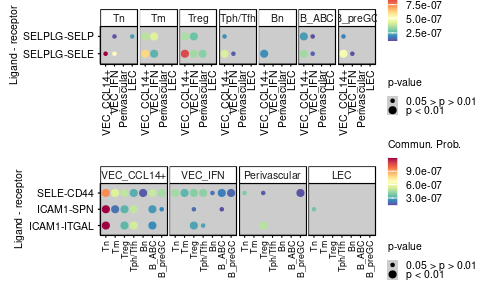

In [137]:
options(repr.plot.width =4.1,repr.plot.height =2.5)
plot_grid(p1,p2, align='v', axis='l', ncol=1, rel_heights = c(1.1,1))

## Fig.6I

Only reorder cell groups but do not rename cell groups!

Reorder cell groups! 



The cell group order before reordering is  B cells FB_ASPN+ FB_COL11A1+ FB_COL18A1+ FB_COL23A1+ FB_Cycling FB_IFN FB_Inflam FB_SFRP1+ FB_SFRP2+ FB_SFRP4+ Macrophage/DC Mast cells NK cells Plasma cells T cells 
The cell group order after reordering is  FB_COL11A1+ FB_COL18A1+ FB_COL23A1+ FB_SFRP1+ FB_SFRP2+ FB_SFRP4+ FB_ASPN+ FB_Inflam FB_IFN FB_Cycling T cells NK cells B cells Plasma cells Macrophage/DC Mast cells 


We now re-run computeCommunProbPathway`,`aggregateNet`, and `netAnalysis_computeCentrality`...



Only reorder cell groups but do not rename cell groups!

Reorder cell groups! 



The cell group order before reordering is  B cells FB_ASPN+ FB_COL11A1+ FB_COL18A1+ FB_COL23A1+ FB_Cycling FB_IFN FB_Inflam FB_SFRP1+ FB_SFRP2+ FB_SFRP4+ Macrophage/DC Mast cells NK cells Plasma cells T cells 
The cell group order after reordering is  FB_COL11A1+ FB_COL18A1+ FB_COL23A1+ FB_SFRP1+ FB_SFRP2+ FB_SFRP4+ FB_ASPN+ FB_Inflam FB_IFN FB_Cycling T cells NK cells B cells Plasma cells Macrophage/DC Mast cells 


We now re-run computeCommunProbPathway`,`aggregateNet`, and `netAnalysis_computeCentrality`...



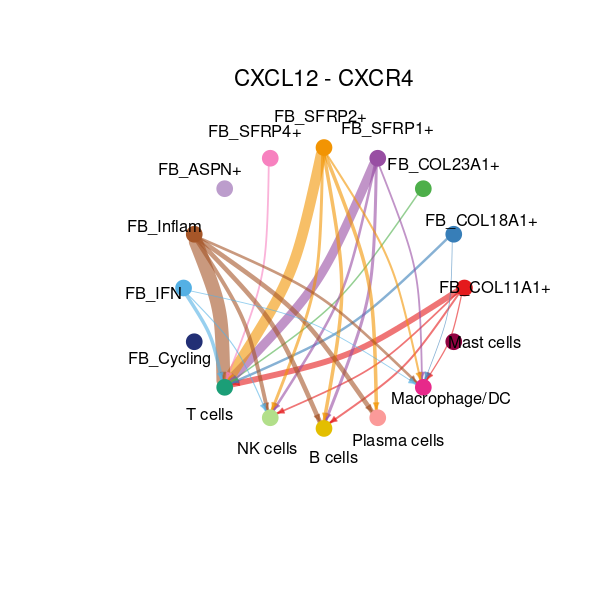

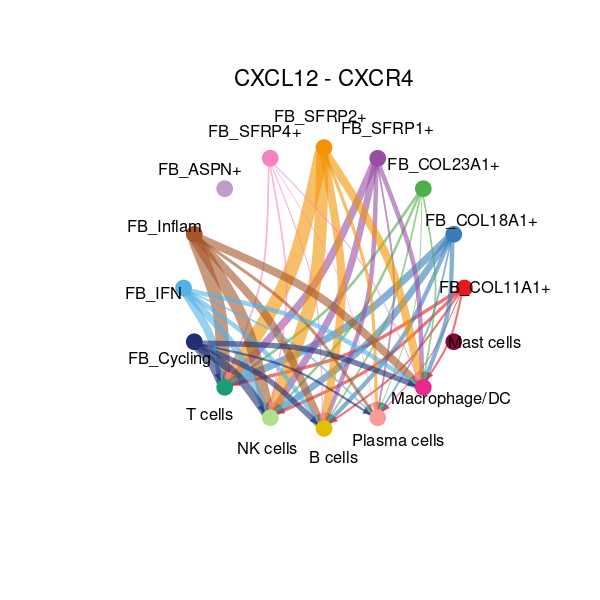

In [86]:
Immune_celltypes = c('T cells','NK cells','B cells','Plasma cells','Macrophage/DC','Mast cells')
cell_order = c(Fib_subtype_order, Immune_celltypes)

samples = c("HC","LE")
merge_data = data.frame()
plots <- list()
for (i in 1:length(samples))
{
cellchat <- readRDS(paste0("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Fib_Endo/Cellchat/Fib_subtype_Immune_celltype_",samples[i],"_0.2.rds"))
options(repr.plot.width =5,repr.plot.height =5)

re_order <- cell_order[cell_order %in% rownames(cellchat@net$weight)]
cellchat <- updateClusterLabels(cellchat, new.order=re_order)
netVisual_individual(cellchat, signaling =  c("CXCL"), pairLR.use = "CXCL12_CXCR4", layout = "circle", arrow.size=0.5, vertex.label.cex = 0.8, 
                     sources.use=Fib_subtype_order, targets.use=Immune_celltypes)
}

## Fig.6J

In [140]:
Fib_subtype_Immu_dist = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Fib_Endo/Fib_subtype_Immu_distance.csv",head=T)
Fib_subtype_Immu_dist$type = factor(Fib_subtype_Immu_dist$type, levels=Fib_subtype_order)
Fib_subtype_Immu_dist = subset(Fib_subtype_Immu_dist, group != 'HC')

In [141]:
Immu_color = c("T cells" = "#63FFAC",
    "NK cells" = "#9467BD" ,
    "B cells" = "#FF34FF",
    "Plasma cells" = "#FF7F0EFF",
    "Macrophage/DC" = "#008941",
    "Mast cells" = "#6A3A4C")

In [142]:
dist_mean_FB_IFN = Fib_subtype_Immu_dist %>% 
    group_by(sample, target, type) %>%
    summarise(mean = mean(value))
dist_mean_FB_IFN = dist_mean_FB_IFN[dist_mean_FB_IFN$type == 'FB_IFN',]
dist_mean_FB_IFN$target = factor(dist_mean_FB_IFN$target, levels = names(Immu_color))

`summarise()` has grouped output by 'sample', 'target'. You can override using
the `.groups` argument.


png 
  2

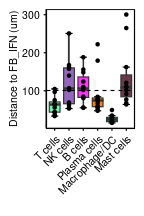

In [199]:
plot = ggplot(dist_mean_FB_IFN, aes(x=target,y=mean)) +
        stat_boxplot(geom = "errorbar", width=0.5, linewidth=0.25) +
        geom_boxplot(aes(fill=target),outlier.shape = NA,size=0.25) + 
        geom_point(size = 1, alpha = 1, shape = 19, stroke = NA, color = 'black', ) + 
        geom_hline(yintercept = 100, linewidth = 0.25, linetype = "dashed") +
        #stat_compare_means(size=1.7,label.x= 1.5, label.y=280,  bracket.size=0.25, label = 'p.format', method = 'kruskal.test') +
        labs(x="",y='Distance to FB_IFN (um)') +
        scale_fill_manual(values=Immu_color) +
        mytheme() + 
        theme(axis.text.x = element_text(size=6, color='black', angle=45, hjust=1, vjust=1),
                legend.position = 'none'  
             )

options(repr.plot.width =1.2,repr.plot.height =1.8)
plot

pdf("../../figures/Cellbin_LE_FB_IFN_Immu_distance.pdf", w=1.2, h=1.8)
plot
dev.off()

## Fig.6K

In [200]:
subtype_den = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/Cell_density_subtype_Der_dist.csv", head=T, row.names=1)
celltype_den = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/Cell_density_celltype_Der_dist.csv", head=T, row.names=1)

In [201]:
merge = merge(subtype_den,celltype_den, by = 'sample')
FB_IFN = subset(merge, subtype == 'FB_IFN' & celltype == "Macrophage/DC")

In [209]:
Fib_plot = ggplot(FB_IFN, aes(x=cell_density_mm2.x, y=cell_density_mm2.y)) + 
                geom_point(shape=19, stroke=NA, size=1) +
                geom_smooth(method=lm, lwd=0.25) +
                #stat_cor(size=1.7, label.y= 900, method = "spearman") +
                labs(y = "Macrophage/DC density (mm2)", x = "FB_IFN density (mm2)") + 
                mytheme()

In [210]:
CCL14_den = subset(subtype_den, subtype == 'VEC_CCL14+')
Tn_den = subset(subtype_den, subtype == 'Tn')
Tph_den = subset(subtype_den, subtype == 'Tph/Tfh')
merge_1 = merge(CCL14_den, Tn_den, by='sample')
merge_2 = merge(CCL14_den, Tph_den, by='sample')

In [211]:
Endo_plot1 = ggplot(merge_1, aes(x=cell_density_mm2.x, y=cell_density_mm2.y)) + 
                geom_point(shape=19, stroke=NA, size=1) +
                geom_smooth(method=lm, lwd=0.25) +
                #stat_cor(size=1.7, method = "spearman", label.y = 5.7) +
                labs(y = "Tn density (mm2)", x = "VEC_CCL14+ density (mm2)") + 
                mytheme()

In [212]:
Endo_plot2 = ggplot(merge_2, aes(x=cell_density_mm2.x, y=cell_density_mm2.y)) + 
                geom_point(shape=19, stroke=NA, size=1) +
                geom_smooth(method=lm, lwd=0.25) +
                #stat_cor(size=1.7, method = "spearman", label.y = 35) +
                labs(y = "Tph/Tfh density (mm2)", x = "VEC_CCL14+ density (mm2)") + 
                mytheme()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

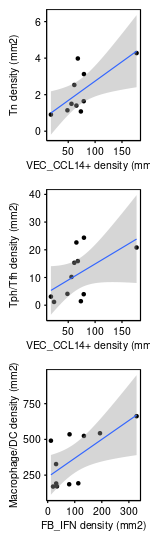

In [214]:
options(repr.plot.width= 1.25,repr.plot.height = 4.5)
plot_grid(Endo_plot1, Endo_plot2,Fib_plot,  ncol=1, align='v')

pdf("../../figures/FB_IFN_VEC_CCL14_Immune_density_correlation.pdf", w=1.25, h=4.5)
plot_grid(Endo_plot1, Endo_plot2, Fib_plot,ncol=1, align='v')
dev.off()

# Python Kernel

In [51]:
import scanpy as sc
import anndata as ad
import pandas as pd
from shapely.geometry import GeometryCollection, Polygon
from shapely import union_all
import warnings
warnings.filterwarnings('ignore')
import importlib


import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

In [2]:
ST_adata = sc.read_h5ad('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/All_samples_Cellbin_filter_gene200_add_anno_dist.h5ad')
sc.pp.normalize_total(ST_adata, target_sum=10000)
sc.pp.log1p(ST_adata)

In [6]:
SC_adata = sc.read("../scRNA_harmony_subtype_for_cell2loc_20240823.h5ad")

## Fig.6A

In [43]:
Fib_subtype_order = ["FB_COL11A1+","FB_COL18A1+","FB_COL23A1+",                       
                       "FB_SFRP1+","FB_SFRP2+","FB_SFRP4+",
                       "FB_ASPN+",
                       "FB_Inflam",
                       "FB_IFN",
                       "FB_Cycling"]

Fib_subtype_colors = {
    "FB_COL11A1+" :"#2CA02CFF",
    "FB_COL18A1+" : "#ff9d3a",
    "FB_COL23A1+" : "#ff73b6",
    "FB_SFRP1+" : '#774898',
    "FB_SFRP2+" :  '#00a8b5',
    "FB_SFRP4+" : "#f9e858",
    "FB_ASPN+" : "#d83034",
    "FB_Inflam" : "#c701ff",
    "FB_IFN" : "#008dff",
    "FB_Cycling" :'#BED754'
}

In [41]:
Fib_adata = sc.read("../Fib_adata.h5ad")

In [44]:
Fib_adata.obs['subtype'] = pd.Categorical(Fib_adata.obs['subtype'], categories=Fib_subtype_order)

[16:24:15] 📃  add palette for `subtype` to adata.uns                                        ]8;id=577791;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=231601;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

Text(0.5, 1.0, 'scRNA-seq\nFibroblasts (26,541)')

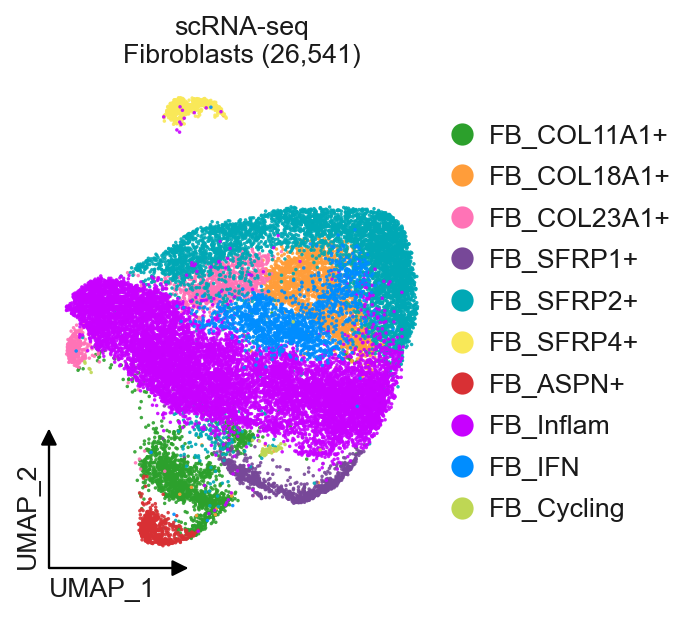

In [45]:
ax = dimplot(Fib_adata, groupby="subtype", arrow=True, palette=Fib_subtype_colors, dot_size=10)
ax.set_title(f"scRNA-seq\nFibroblasts ({format(Fib_adata.obs.shape[0], ',')})")

In [46]:
Endo_subtype_order = ["VEC_CCL14+","VEC_IFN","Perivascular","LEC"]
Endo_subtype_colors = {
    "VEC_CCL14+":"#003a7d",  
    "VEC_IFN":"#5e4c5f",
    "Perivascular":'#b7c9f2', 
    "LEC":'#e62a76'
}

In [47]:
Endo_adata = sc.read("../Endo_adata.h5ad")

In [48]:
Endo_adata.obs['subtype'] = pd.Categorical(Endo_adata.obs['subtype'], categories=Endo_subtype_order)

[16:24:31] 📃  add palette for `subtype` to adata.uns                                        ]8;id=832529;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=247338;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

Text(0.5, 1.0, 'scRNA-seq\nEndothelial cells (4,583)')

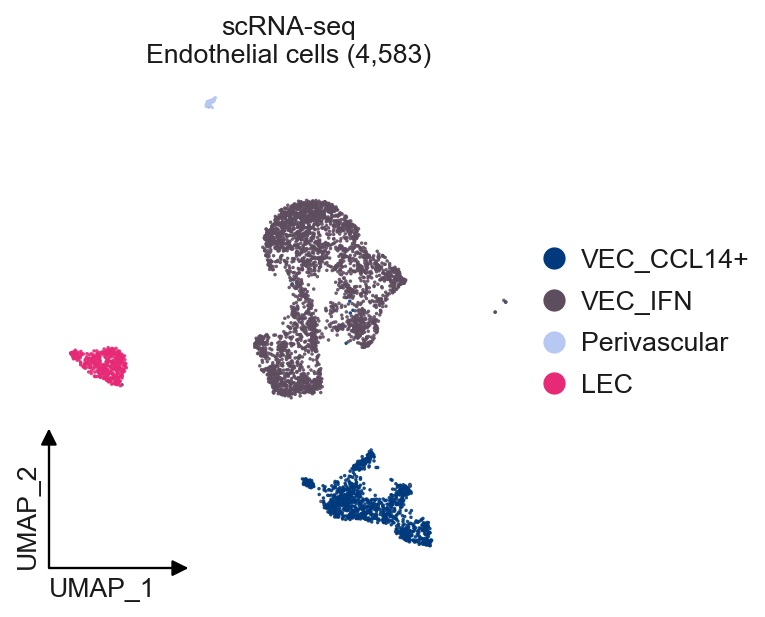

In [49]:
ax = dimplot(Endo_adata, groupby="subtype", arrow=True, palette=Endo_subtype_colors, dot_size=10)
ax.set_title(f"scRNA-seq\nEndothelial cells ({format(Endo_adata.obs.shape[0], ',')})")

## Fig.6D

In [58]:
TLS_and_buffer_all_adata = sc.read("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/All_sample_All_TLS_and_buffer_region_adata.h5ad")
TLS_and_buffer_ring_adata = sc.read("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/TLS_ring20-100_cell.h5ad")

In [59]:
stromal_celltypes = ['Fibroblasts',"Endothelial cells","Smooth muscle cells"]
TLS_and_buffer_all_adata_sub = TLS_and_buffer_all_adata[TLS_and_buffer_all_adata.obs['celltype'].isin(stromal_celltypes)]
stromal_subtypes = TLS_and_buffer_all_adata_sub.obs['subtype'].unique()

In [60]:
SMC_color = {"Smooth muscle cells" :"#6B7900"}
subtype_colors = Fib_subtype_colors | Endo_subtype_colors | SMC_color

[16:53:34] ❕  ssat is not registered, register now                                           ]8;id=694970;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=183478;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `subtype` to adata.uns                                        ]8;id=719201;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=893978;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:35] ❕  ssat is not registered, register now                                           ]8;id=494667;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=562410;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `subtype` to adata.uns                                        ]8;id=571984;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=600013;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

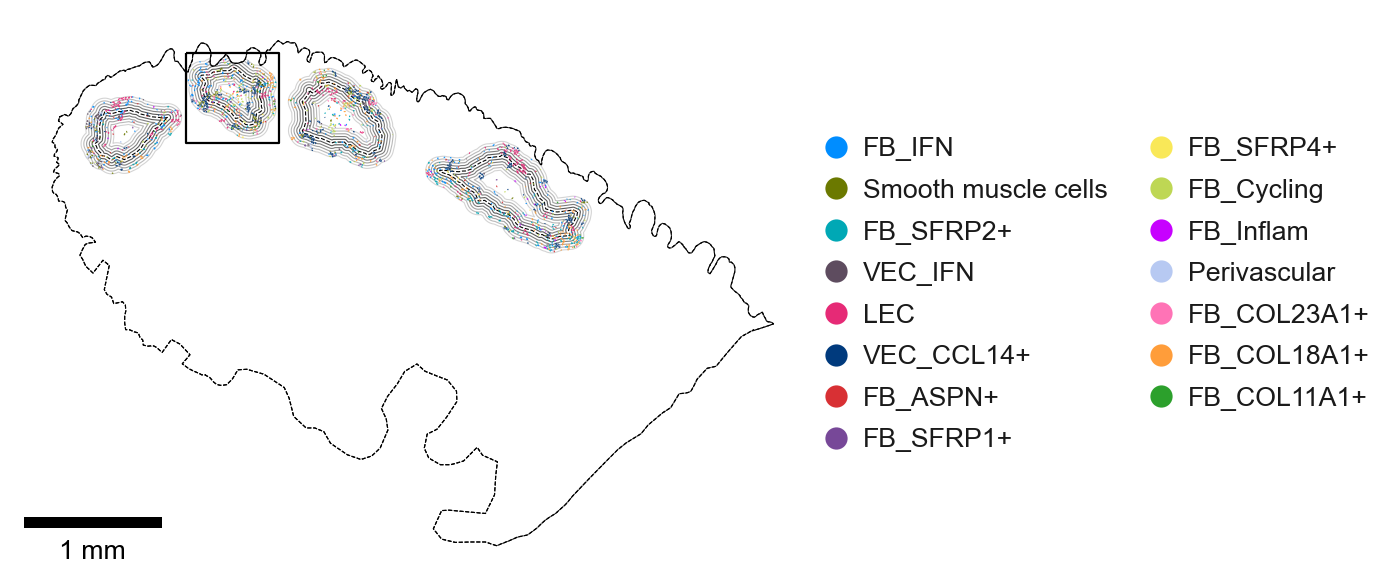

In [61]:
zone = {'DLE3' : [8100,15500,9450,16800]}
polygon = Polygon([[8100,16800], [9450,16800],[9450,15500], [8100,15500]])
samples =['DLE3']

cell_num = []
outer_keys = []
inner_keys = []
adata_index = 0
merge_adata_file = {}

for sample in samples:  
    sample_adata = ST_adata[(ST_adata.obs['sample'] == sample) & (ST_adata.obs['Region'] == 'Der')]
    sample_adata_TLS_out = TLS_and_buffer_ring_adata[(TLS_and_buffer_ring_adata.obs['sample'] == sample) & (TLS_and_buffer_ring_adata.obs['Region'] == 'Der') & (TLS_and_buffer_ring_adata.obs['ring'] > 0)]
    sample_adata_TLS = TLS_and_buffer_all_adata_sub[(TLS_and_buffer_all_adata_sub.obs['sample'] == sample) & (TLS_and_buffer_all_adata_sub.obs['TLS_region'] == 'TLS')]
    
    Der_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/SHP_file/{sample}_Der_tussue_contour.shp")
    
    shp_TLS = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/{sample}_cell_contour.shp")
    shp_TLS_buffer = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/{sample}_cell_contour_buffer.shp")
    shp_TLS = union_all(shp_TLS['geometry'].buffer(0))
    shp_TLS = gpd.GeoDataFrame({'geometry': [shp_TLS]})
 
    buffer_results = {}
    for i in [40, 80, 120, 160, 200]:
        outer_buffer_shp = union_all(shp_TLS['geometry'].buffer(i))
        outer_buffer_shp = gpd.GeoDataFrame({'geometry': [outer_buffer_shp]})
        buffer_results[f'outer_buffer_{i}'] = Der_shp.intersection(outer_buffer_shp)

        key = f'outer_buffer_{i}'
        outer_keys.append(key)
        if i == 40:
            buffer_results[f'outer_buffer_ring_{i}'] = gpd.GeoDataFrame(geometry=buffer_results[f'outer_buffer_{i}'].difference(shp_TLS))
        else:
            outer_prev_key = outer_keys[-2]
            buffer_results[f'outer_buffer_ring_{i}'] = gpd.GeoDataFrame(geometry=buffer_results[f'outer_buffer_{i}'].difference(buffer_results[outer_prev_key]))

        area_outer_ring = buffer_results[f'outer_buffer_ring_{i}'].iloc[0].geometry.area * 0.25/1000000

    TLS_results = {}
    for i in [-40, -80, -120, -160, -200]:
        a = -i
        inner_buffer_shp = union_all(shp_TLS['geometry'].buffer(i))
        inner_buffer_shp = gpd.GeoDataFrame({'geometry': [inner_buffer_shp]})
        TLS_results[f'inner_buffer_{a}'] = inner_buffer_shp #Der_shp.intersection(inner_buffer_shp)
    
        key = f'inner_buffer_{a}'
        inner_keys.append(key)
        if i == -40:
            TLS_results[f'inner_buffer_ring_{a}'] = gpd.GeoDataFrame(geometry=shp_TLS.difference(TLS_results[f'inner_buffer_{a}']))
        else:
            inner_prev_key = inner_keys[-2]
            TLS_results[f'inner_buffer_ring_{a}'] = gpd.GeoDataFrame(geometry=TLS_results[inner_prev_key].difference(TLS_results[f'inner_buffer_{a}']))
        
        area_inner_ring = TLS_results[f'inner_buffer_ring_{a}'].iloc[0].geometry.area * 0.25/1000000  
        
    ax= shp_TLS.plot(edgecolor='black',facecolor='none', linewidth=0.5, linestyle='--')
    
    buffer_results['outer_buffer_40'].plot(ax=ax, edgecolor='#595959',facecolor='none', linewidth=0.5)
    buffer_results['outer_buffer_80'].plot(ax=ax, edgecolor='#7f7f7f',facecolor='none', linewidth=0.5)
    buffer_results['outer_buffer_120'].plot(ax=ax, edgecolor='#a1a1a1',facecolor='none',  linewidth=0.5)
    buffer_results['outer_buffer_160'].plot(ax=ax, edgecolor='#bababa',facecolor='none', linewidth=0.5)
    buffer_results['outer_buffer_200'].plot(ax=ax, edgecolor='#d4d4d4',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_40'].plot(ax=ax, edgecolor='#595959',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_80'].plot(ax=ax, edgecolor='#7f7f7f',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_120'].plot(ax=ax, edgecolor='#a1a1a1',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_160'].plot(ax=ax, edgecolor='#bababa',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_200'].plot(ax=ax, edgecolor='#d4d4d4',facecolor='none', linewidth=0.5)
    dimplot(sample_adata_TLS, ax=ax, groupby='subtype', order=stromal_subtypes, reduction='contour',  palette=subtype_colors) 
    dimplot(sample_adata_TLS_out,ax=ax, groupby='subtype', order=stromal_subtypes, reduction='contour', palette=subtype_colors) #height=10,    
    Der_shp.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.5, linestyle='--')
    draw_scalebar(ax=ax, location='lower left', color='black')
    gpd.GeoSeries(polygon).plot(ax=ax, facecolor='none', edgecolor='black')
    #ax.set_xlim([zone[sample][0]-20,zone[sample][2]+20])
    #ax.set_ylim([zone[sample][1]-20,zone[sample][3]+20])

[16:53:41] ❕  ssat is not registered, register now                                           ]8;id=447397;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=733273;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `subtype` to adata.uns                                        ]8;id=926119;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=568472;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:42] ❕  ssat is not registered, register now                                           ]8;id=125963;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=112599;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `subtype` to adata.uns                                        ]8;id=298416;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=169913;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

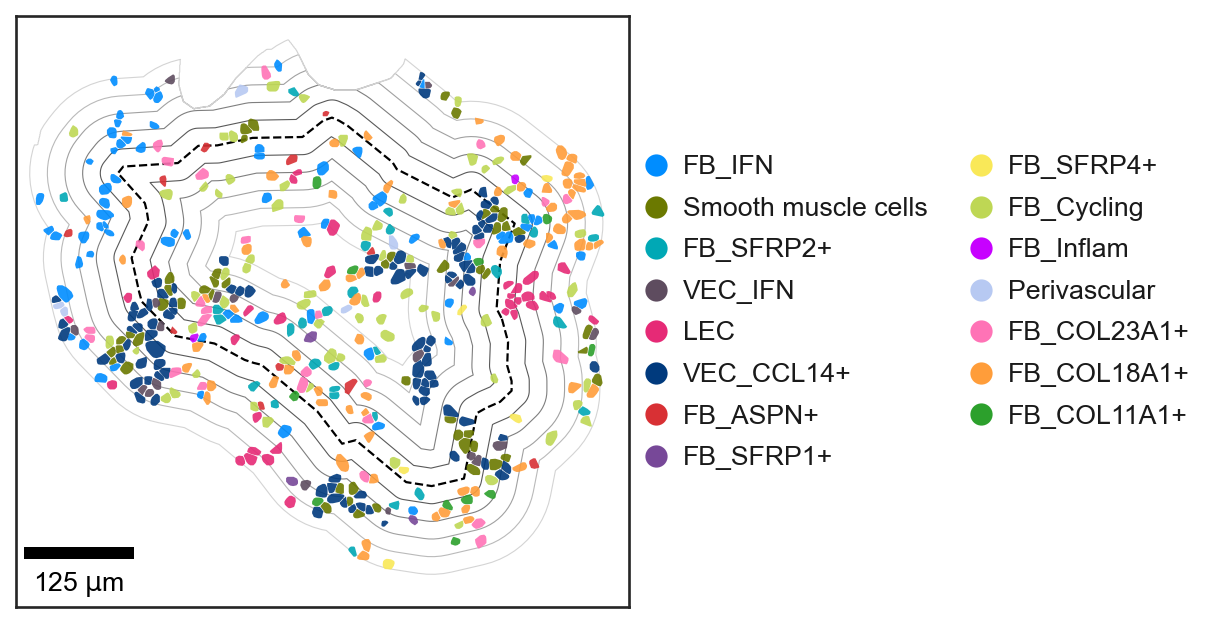

In [62]:
zone = {'DLE3' : [8100,15500,9450,16800]}
polygon = Polygon([[8100,16800], [9450,16800],[9450,15500], [8100,15500]])
samples =['DLE3']

cell_num = []
outer_keys = []
inner_keys = []
adata_index = 0
merge_adata_file = {}

for sample in samples:  
    sample_adata = ST_adata[(ST_adata.obs['sample'] == sample) & (ST_adata.obs['Region'] == 'Der')]
    sample_adata_TLS_out = TLS_and_buffer_ring_adata[(TLS_and_buffer_ring_adata.obs['sample'] == sample) & (TLS_and_buffer_ring_adata.obs['Region'] == 'Der') & (TLS_and_buffer_ring_adata.obs['ring'] > 0)]
    sample_adata_TLS = TLS_and_buffer_all_adata_sub[(TLS_and_buffer_all_adata_sub.obs['sample'] == sample) & (TLS_and_buffer_all_adata_sub.obs['TLS_region'] == 'TLS')]
    
    Der_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/SHP_file/{sample}_Der_tussue_contour.shp")
    
    shp_TLS = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/{sample}_cell_contour.shp")
    shp_TLS_buffer = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/{sample}_cell_contour_buffer.shp")
    shp_TLS = union_all(shp_TLS['geometry'].buffer(0))
    shp_TLS = gpd.GeoDataFrame({'geometry': [shp_TLS]})
 
    buffer_results = {}
    for i in [40, 80, 120, 160, 200]:
        outer_buffer_shp = union_all(shp_TLS['geometry'].buffer(i))
        outer_buffer_shp = gpd.GeoDataFrame({'geometry': [outer_buffer_shp]})
        buffer_results[f'outer_buffer_{i}'] = Der_shp.intersection(outer_buffer_shp)

        key = f'outer_buffer_{i}'
        outer_keys.append(key)
        if i == 40:
            buffer_results[f'outer_buffer_ring_{i}'] = gpd.GeoDataFrame(geometry=buffer_results[f'outer_buffer_{i}'].difference(shp_TLS))
        else:
            outer_prev_key = outer_keys[-2]
            buffer_results[f'outer_buffer_ring_{i}'] = gpd.GeoDataFrame(geometry=buffer_results[f'outer_buffer_{i}'].difference(buffer_results[outer_prev_key]))

        area_outer_ring = buffer_results[f'outer_buffer_ring_{i}'].iloc[0].geometry.area * 0.25/1000000

    TLS_results = {}
    for i in [-40, -80, -120, -160, -200]:
        a = -i
        inner_buffer_shp = union_all(shp_TLS['geometry'].buffer(i))
        inner_buffer_shp = gpd.GeoDataFrame({'geometry': [inner_buffer_shp]})
        TLS_results[f'inner_buffer_{a}'] = inner_buffer_shp #Der_shp.intersection(inner_buffer_shp)
    
        key = f'inner_buffer_{a}'
        inner_keys.append(key)
        if i == -40:
            TLS_results[f'inner_buffer_ring_{a}'] = gpd.GeoDataFrame(geometry=shp_TLS.difference(TLS_results[f'inner_buffer_{a}']))
        else:
            inner_prev_key = inner_keys[-2]
            TLS_results[f'inner_buffer_ring_{a}'] = gpd.GeoDataFrame(geometry=TLS_results[inner_prev_key].difference(TLS_results[f'inner_buffer_{a}']))
        
        area_inner_ring = TLS_results[f'inner_buffer_ring_{a}'].iloc[0].geometry.area * 0.25/1000000  
        
    ax= shp_TLS.plot(edgecolor='black',facecolor='none', linewidth=1, linestyle='--')
    
    buffer_results['outer_buffer_40'].plot(ax=ax, edgecolor='#595959',facecolor='none', linewidth=0.5)
    buffer_results['outer_buffer_80'].plot(ax=ax, edgecolor='#7f7f7f',facecolor='none', linewidth=0.5)
    buffer_results['outer_buffer_120'].plot(ax=ax, edgecolor='#a1a1a1',facecolor='none',  linewidth=0.5)
    buffer_results['outer_buffer_160'].plot(ax=ax, edgecolor='#bababa',facecolor='none', linewidth=0.5)
    buffer_results['outer_buffer_200'].plot(ax=ax, edgecolor='#d4d4d4',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_40'].plot(ax=ax, edgecolor='#595959',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_80'].plot(ax=ax, edgecolor='#7f7f7f',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_120'].plot(ax=ax, edgecolor='#a1a1a1',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_160'].plot(ax=ax, edgecolor='#bababa',facecolor='none', linewidth=0.5)
    TLS_results['inner_buffer_200'].plot(ax=ax, edgecolor='#d4d4d4',facecolor='none', linewidth=0.5)
    dimplot(sample_adata_TLS, ax=ax, groupby='subtype', order=stromal_subtypes, reduction='contour',  palette=subtype_colors) 
    dimplot(sample_adata_TLS_out,ax=ax, groupby='subtype', order=stromal_subtypes, reduction='contour', palette=subtype_colors) #height=10, 
   
    draw_scalebar(ax=ax, location='lower left', color='black')
    sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
    #gpd.GeoSeries(polygon).plot(ax=ax, facecolor='none', edgecolor='black')
    ax.set_xlim([zone[sample][0]-20,zone[sample][2]+20])
    ax.set_ylim([zone[sample][1]-20,zone[sample][3]+20])

## Fig.6F

In [46]:
from shapely.affinity import scale
def flip_y(geometry):
    return scale(geometry, xfact=1, yfact=-1, origin=(0, 0))

[09:42:35] 📃  add palette for `subtype` to adata.uns                                        ]8;id=916605;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=792810;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

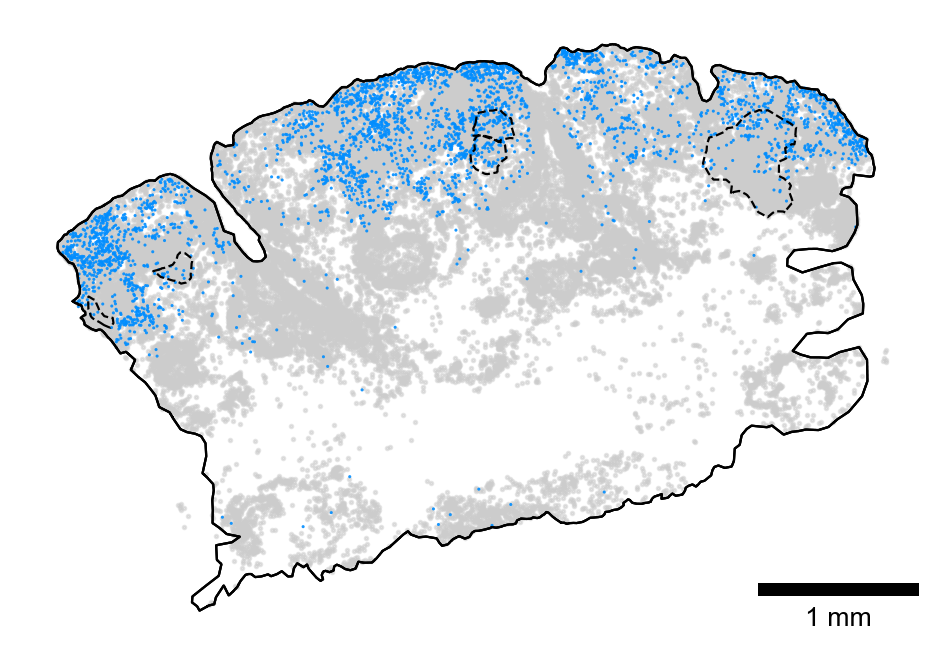

In [50]:
SLE5_adata = ST_adata[(ST_adata.obs['sample'] == 'SLE5') & (ST_adata.obs['Region'] == 'Der')]
Der_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/SHP_file/SLE5_Der_tussue_contour.shp")
TLS_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/SLE5_cell_contour.shp")
Der_shp['geometry'] = Der_shp['geometry'].apply(flip_y)
TLS_shp['geometry'] = TLS_shp['geometry'].apply(flip_y)
ax = dimplot(sample_adata, background=True,reduction="spatial",groupby='subtype', order=['FB_IFN'],height=7,dot_size=30,legend=False, palette=Fib_subtype_colors)
Der_shp.plot(ax=ax, edgecolor='black',facecolor='none',  linewidth=1) 
TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1)
draw_scalebar(ax=ax, location='lower right', color='black')

## Fig.6L

In [3]:
LRs = [['SELPLG','SELE'], ["CXCL12","CXCR4"], ['CCL19','CCR7']]

[16:52:05] ❕  ssat is not registered, register now                                           ]8;id=817765;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=911570;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

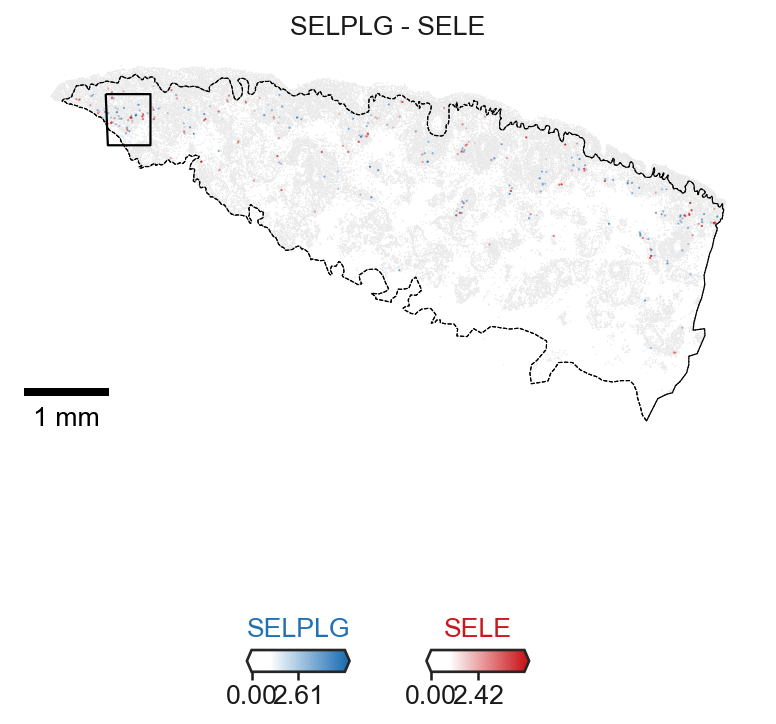

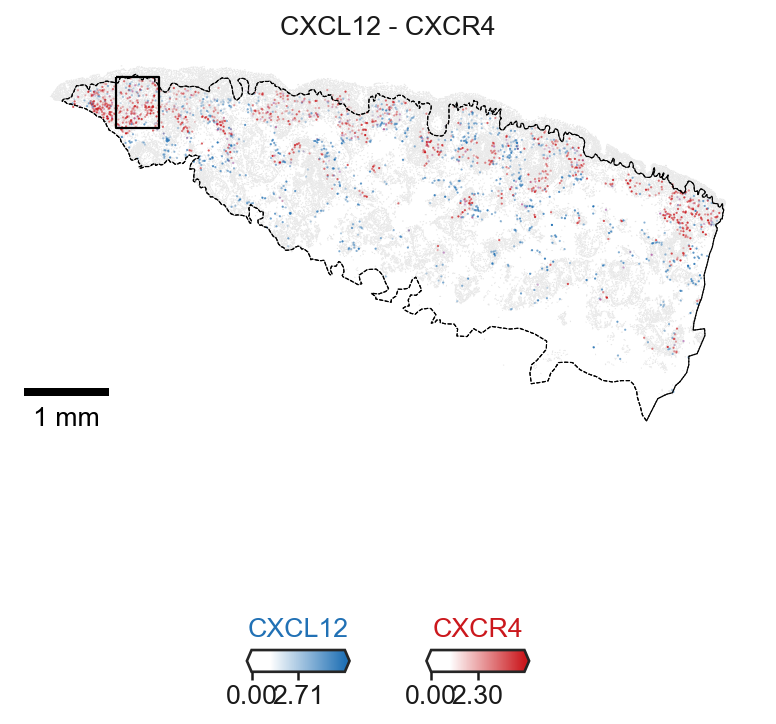

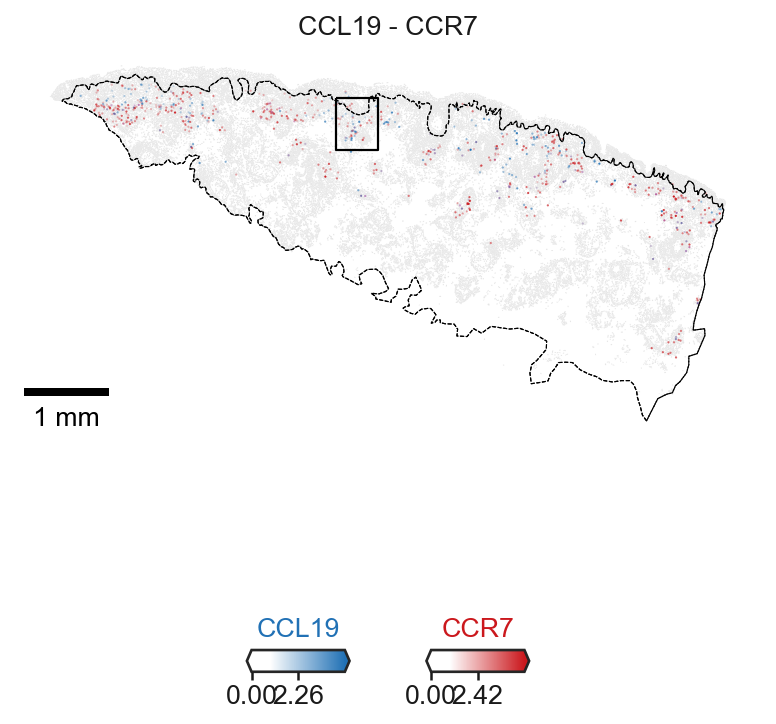

In [52]:
polygons = [[Polygon([[11100,17700], [12150,17700],[12150,16500], [11150,16500]])],
            [Polygon([[11350,18100], [12350,18100],[12350,16900], [11350,16900]])],
            [Polygon([[16500,17600], [17500,17600],[17500,16400], [16500,16400]])]
           ]

Der_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Tissue_line/SHP_file/SLE2_Der_tussue_contour.shp")
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']  

for i, gene in enumerate(LRs):
    ligand_gene = LRs[i][0]
    receptor_gene = LRs[i][1]
    if i == 0:
        source_ligand = (SLE2_adata.obs.celltype.isin(['T cells'])) & (fetch_data(SLE2_adata, ligand_gene).sum(axis=1) > 0)
        target_receptor = (SLE2_adata.obs.subtype.isin(['VEC_CCL14+'])) & (fetch_data(SLE2_adata, receptor_gene).sum(axis=1) > 0)       
    elif i ==1:
        source_ligand = (SLE2_adata.obs.celltype.isin(['Fibroblasts'])) & (fetch_data(SLE2_adata, ligand_gene).sum(axis=1) > 0)
        target_receptor = (SLE2_adata.obs.celltype.isin(['Macrophage/DC','T cells',"B cells"])) & (fetch_data(SLE2_adata, receptor_gene).sum(axis=1) > 0)
    else :
        source_ligand = (SLE2_adata.obs.subtype.isin(['FB_IFN'])) & (fetch_data(SLE2_adata, ligand_gene).sum(axis=1) > 0)
        target_receptor = (SLE2_adata.obs.celltype.isin(['Macrophage/DC','T cells',"B cells"])) & (fetch_data(SLE2_adata, receptor_gene).sum(axis=1) > 0)
    ax = plot_spatial(SLE2_adata[source_ligand | target_receptor], 
                      [ligand_gene,receptor_gene], 
                      reduction='spatial', dot_size=1, show_img=False, max_color_quantile=.95, figsize=[6,6], raster=False, 
                      style='fast', reorder_cmap=[2,1])
    
    dimplot(SLE2_adata, background=True, reduction='contour',  ax=ax, raster=False)
    Der_shp.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=0.5, linestyle='--')
    draw_scalebar(ax=ax, location='lower left', color='black')
    ax.set_title(f"{ligand_gene} - {receptor_gene}")
    gpd.GeoSeries(polygons[i]).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1)
    #save_fig(f"../../figures/Cellbin_SLE2_{ligand_gene}_{receptor_gene}_spatial_exression_whole")

[16:52:47] 📃  Filtering contour within bounding box [11100, 16500, 12150, 17700]            ]8;id=419749;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=776527;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=93583;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=379705;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

[16:52:48] 📃  Filtering contour within bounding box [11350, 16900, 12350, 18100]            ]8;id=964625;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=384943;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=250822;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=247213;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

[16:52:49] 📃  Filtering contour within bounding box [16500, 16400, 17500, 17600]            ]8;id=216051;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=321505;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=351000;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=343243;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

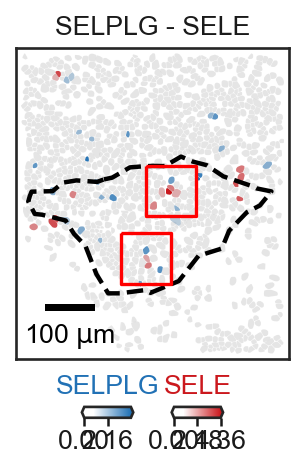

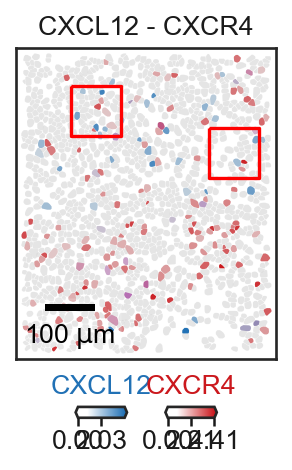

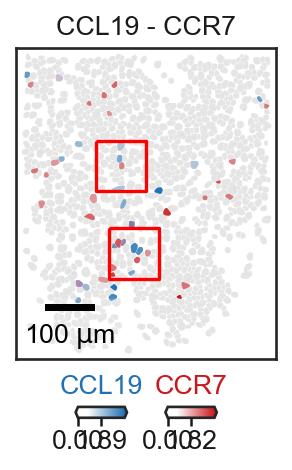

In [53]:
polygons = [[Polygon([[11600,17250], [11800,17250],[11800,17050], [11600,17050]]), Polygon([[11500,16980], [11700,16980],[11700,16780], [11500,16780]])],
            [Polygon([[11550,17970], [11750,17970],[11750,17770], [11550,17770]]), Polygon([[12100,17800], [12300,17800],[12300,17600], [12100,17600]])],
            [Polygon([[16800,17250], [17000,17250],[17000,17050], [16800,17050]]), Polygon([[16850,16900], [17050,16900],[17050,16700], [16850,16700]])]
           ]

TLS_shp = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/SLE2_cell_contour.shp")
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']  

zone = [[11100,16500,12150,17700],[11350,16900,12350,18100],[16500,16400,17500,17600]]

for i, gene in enumerate(LRs):
    ligand_gene = LRs[i][0]
    receptor_gene = LRs[i][1]
    zone_adata = within(SLE2_adata, zone[i], reduction ='contour', inplace=True)
    if i == 0:
        source_ligand = (zone_adata.obs.celltype.isin(['T cells'])) & (fetch_data(zone_adata, ligand_gene).sum(axis=1) > 0)
        target_receptor = (zone_adata.obs.subtype.isin(['VEC_CCL14+'])) & (fetch_data(zone_adata, receptor_gene).sum(axis=1) > 0)       
    elif i ==1:
        source_ligand = (zone_adata.obs.celltype.isin(['Fibroblasts'])) & (fetch_data(zone_adata, ligand_gene).sum(axis=1) > 0)
        target_receptor = (zone_adata.obs.celltype.isin(['Macrophage/DC','T cells',"B cells"])) & (fetch_data(zone_adata, receptor_gene).sum(axis=1) > 0)
    else :
        source_ligand = (zone_adata.obs.subtype.isin(['FB_IFN'])) & (fetch_data(zone_adata, ligand_gene).sum(axis=1) > 0)
        target_receptor = (zone_adata.obs.celltype.isin(['Macrophage/DC','T cells',"B cells"])) & (fetch_data(zone_adata, receptor_gene).sum(axis=1) > 0)      
    
    ax = plot_spatial(zone_adata[source_ligand | target_receptor], 
                      [ligand_gene,receptor_gene], 
                      reduction='contour', show_img=False, max_color_quantile=.95, figsize=[3,3], raster=False, 
                      style='fast', reorder_cmap=[2,1])
    
    dimplot(zone_adata, reduction='contour', ax=ax, raster=False)
    if i == 0:
        TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=2, linestyle='--')
    draw_scalebar(ax=ax, location='lower left', color='black')
    ax.set_title(f"{ligand_gene} - {receptor_gene}")
    gpd.GeoSeries(polygons[i]).plot(ax=ax, edgecolor='red',facecolor='none', linewidth=1.5)
    sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
    ax.set_xlim([zone[i][0]-20,zone[i][2]+20])
    ax.set_ylim([zone[i][1]-20,zone[i][3]+20])
    #save_fig(f"../../figures/Cellbin_SLE2_{ligand_gene}_{receptor_gene}_spatial_exression_part")

In [19]:
zones = [[[11600,17020,11800,17220],[11500,16780,11700,16980]],
         [[11550,17770,11750,17970],[12100,17600,12300,17800]],
         [[16800,17050,17000,17250],[16850,16700,17050,16900]]
        ]

[16:52:52] 📃  Filtering contour within bounding box [11600, 17020, 11800, 17220]            ]8;id=590828;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=997479;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=231757;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=222620;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

[16:52:53] 📃  Filtering contour within bounding box [11500, 16780, 11700, 16980]            ]8;id=547946;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=260423;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=326896;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=286715;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

[16:52:54] 📃  Filtering contour within bounding box [11550, 17770, 11750, 17970]            ]8;id=747958;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=412277;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=148218;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=284089;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

[16:52:55] 📃  Filtering contour within bounding box [12100, 17600, 12300, 17800]            ]8;id=583908;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=58026;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=887420;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=786122;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

[16:52:56] 📃  Filtering contour within bounding box [16800, 17050, 17000, 17250]            ]8;id=98909;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=836600;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=858089;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=686144;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

[16:52:57] 📃  Filtering contour within bounding box [16850, 16700, 17050, 16900]            ]8;id=692202;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=19290;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=305291;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=817398;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

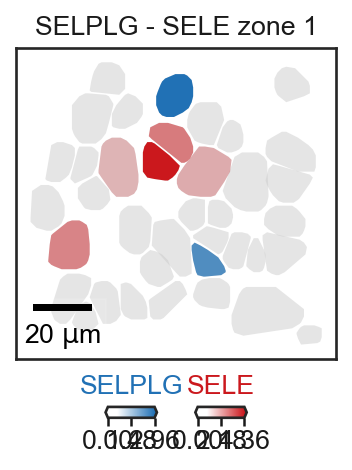

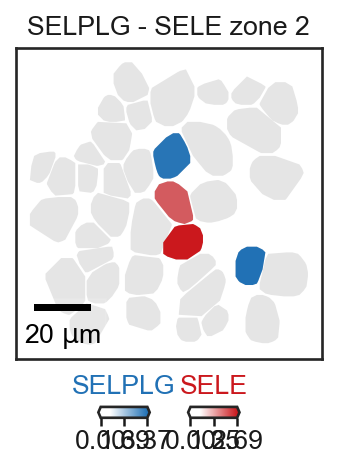

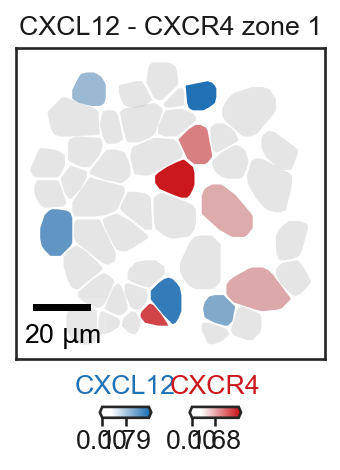

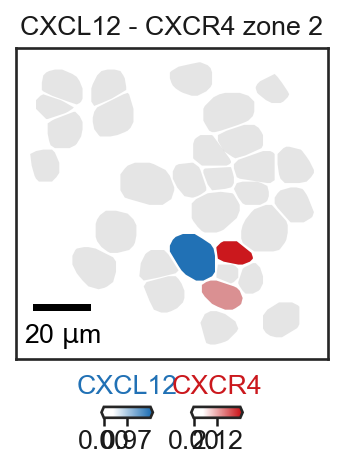

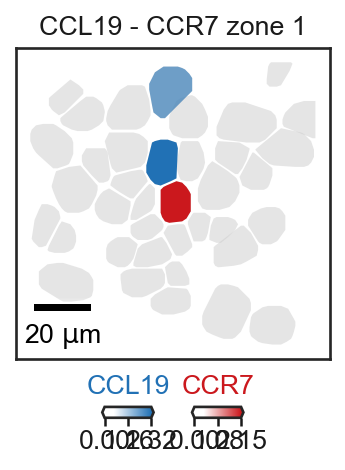

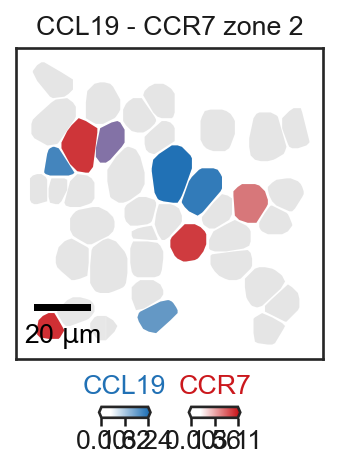

In [54]:
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']  

for i, gene in enumerate(LRs):
    ligand_gene = LRs[i][0]
    receptor_gene = LRs[i][1]
    for j in [0, 1]:
        zone_adata = within(SLE2_adata, zones[i][j], reduction ='contour', inplace=True)
        if i == 0:
            source_ligand = (zone_adata.obs.celltype.isin(['T cells'])) & (fetch_data(zone_adata, ligand_gene).sum(axis=1) > 0)
            target_receptor = (zone_adata.obs.subtype.isin(['VEC_CCL14+'])) & (fetch_data(zone_adata, receptor_gene).sum(axis=1) > 0)       
        elif i ==1:
            source_ligand = (zone_adata.obs.celltype.isin(['Fibroblasts'])) & (fetch_data(zone_adata, ligand_gene).sum(axis=1) > 0)
            target_receptor = (zone_adata.obs.celltype.isin(['Macrophage/DC','T cells',"B cells"])) & (fetch_data(zone_adata, receptor_gene).sum(axis=1) > 0)
        else :
            source_ligand = (zone_adata.obs.subtype.isin(['FB_IFN'])) & (fetch_data(zone_adata, ligand_gene).sum(axis=1) > 0)
            target_receptor = (zone_adata.obs.celltype.isin(['Macrophage/DC','T cells',"B cells"])) & (fetch_data(zone_adata, receptor_gene).sum(axis=1) > 0)      
          
        ax = plot_spatial(zone_adata[source_ligand | target_receptor], 
                          [ligand_gene,receptor_gene], 
                          reduction='contour', show_img=False, max_color_quantile=.95, figsize=[3,3], raster=False, 
                          style='fast', reorder_cmap=[2,1])
        
        dimplot(zone_adata, reduction='contour', ax=ax, raster=False)
        draw_scalebar(ax=ax, location='lower left', color='black')
        ax.set_title(f"{ligand_gene} - {receptor_gene} zone {j+1 }")
        sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
        #save_fig(f"../../figures/Cellbin_SLE2_{ligand_gene}_{receptor_gene}_spatial_exression_zone{j}")

In [55]:
celltype_color = {
    "VEC_CCL14+":"#003a7d",
    "Fibroblasts" : "#8FB0FF",
    "T cells" : "#63FFAC",   
    "NK cells" : "#9467BD" ,
    "B cells" : "#FF34FF",
    "Plasma cells" :"#FF7F0EFF",
    "Macrophage/DC" : "#008941",
    'FB_IFN' : '#008dff'
    
}

[16:52:59] 📃  Filtering contour within bounding box [11100, 16500, 12150, 17700]            ]8;id=875086;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=260632;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=407617;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=351937;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=743505;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=627820;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:01] 📃  Filtering contour within bounding box [11350, 16900, 12350, 18100]            ]8;id=717839;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=335296;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=179059;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=162964;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=858427;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=755989;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:02] 📃  Filtering contour within bounding box [16500, 16400, 17500, 17600]            ]8;id=307309;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=121286;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=86117;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=562564;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=477163;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=36928;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

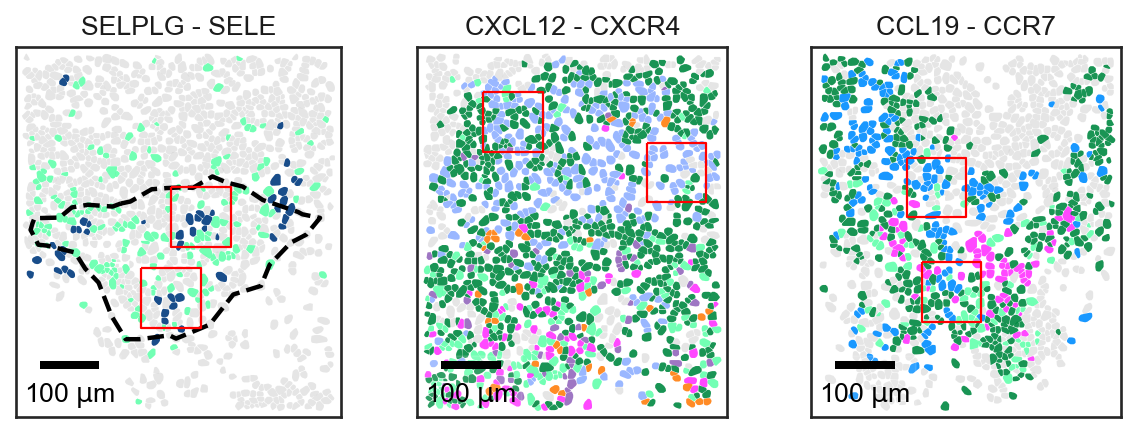

In [56]:
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']  

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(9, 3))

zone = [[11100,16500,12150,17700],[11350,16900,12350,18100], [16500,16400,17500,17600]]
for i, gene in enumerate(LRs):
    ligand_gene = LRs[i][0]
    receptor_gene = LRs[i][1]
    ax = axs[i]
    zone_adata = within(SLE2_adata, zone[i], reduction ='contour', inplace=True) 
    if i == 0:
        zone_adata.obs['celltype'] = zone_adata.obs.apply(lambda x: x['subtype'] if 'Endothelial cells' in x['celltype'] else x['celltype'], axis=1)
        celltype = ['VEC_CCL14+', 'T cells']
    elif i ==1: 
        celltype = ['Fibroblasts', 'T cells', 'NK cells', 'B cells', 'Plasma cells', 'Macrophage/DC']
    else:
        zone_adata.obs['celltype'] = zone_adata.obs.apply(lambda x: x['subtype'] if 'Fibroblasts' in x['celltype'] else x['celltype'], axis=1)
        celltype = ['FB_IFN', 'T cells','B cells', 'Macrophage/DC']
        
    ax= dimplot(zone_adata, background=True, reduction='contour', groupby='celltype', order = celltype, palette=celltype_color,legend=False, ax=ax)
    if i == 0:
        TLS_shp.plot(ax=ax, edgecolor='black',facecolor='none', linewidth=2, linestyle='--')
    draw_scalebar(ax=ax, location='lower left', color='black')
    ax.set_title(f"{ligand_gene} - {receptor_gene}")
    gpd.GeoSeries(polygons[i]).plot(ax=ax, edgecolor='red',facecolor='none', linewidth=1)
    sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
    ax.set_xlim([zone[i][0]-20,zone[i][2]+20])
    ax.set_ylim([zone[i][1]-20,zone[i][3]+20])
#save_fig("../../figures/Cellbin_SLE2_spatial_celltype_part")

[16:53:04] 📃  Filtering contour within bounding box [11600, 17020, 11800, 17220]            ]8;id=493188;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=931205;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=618241;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=201620;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=936701;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=140904;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:06] 📃  Filtering contour within bounding box [11500, 16780, 11700, 16980]            ]8;id=686131;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=102411;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=803740;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=204778;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=959007;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=12554;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:07] 📃  Filtering contour within bounding box [11550, 17770, 11750, 17970]            ]8;id=771962;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=456341;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=325091;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=944991;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=30886;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=302257;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:08] 📃  Filtering contour within bounding box [12100, 17600, 12300, 17800]            ]8;id=246251;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=577069;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=125928;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=121946;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=47202;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=588496;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:09] 📃  Filtering contour within bounding box [16800, 17050, 17000, 17250]            ]8;id=159167;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=626213;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=508141;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=450324;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=270138;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=572867;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

[16:53:11] 📃  Filtering contour within bounding box [16850, 16700, 17050, 16900]            ]8;id=939081;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=462973;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=191861;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=229616;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=554523;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py\utils_20250718.py]8;;\:]8;id=474098;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Figure6/utils_20250718.py#1526\1526]8;;\

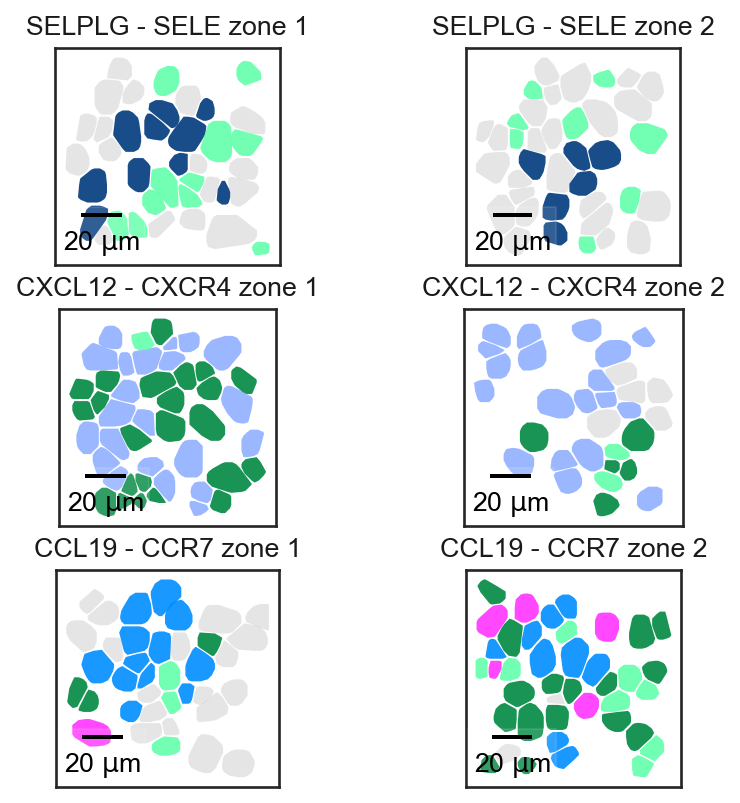

In [57]:
SLE2_adata = ST_adata[ST_adata.obs['sample'] == 'SLE2']  
SLE2_adata = SLE2_adata[SLE2_adata.obs.Region == 'Der']

fig, axs = plt.subplots(nrows=3,ncols=2,figsize=(6, 6),squeeze=False)

for i, gene in enumerate(LRs):
    ligand_gene = LRs[i][0]
    receptor_gene = LRs[i][1]
    for j in [0, 1]:
        ax = axs[i,j]
        zone_adata = within(SLE2_adata, zones[i][j], reduction ='contour', inplace=True) 
        if i == 0:
            zone_adata.obs['celltype'] = zone_adata.obs.apply(lambda x: x['subtype'] if 'Endothelial cells' in x['celltype'] else x['celltype'], axis=1)
            celltype = ['VEC_CCL14+', 'T cells']
        elif i ==1: 
            celltype = ['Fibroblasts', 'T cells', 'NK cells', 'B cells', 'Plasma cells', 'Macrophage/DC']
        else:
            zone_adata.obs['celltype'] = zone_adata.obs.apply(lambda x: x['subtype'] if 'Fibroblasts' in x['celltype'] else x['celltype'], axis=1)
            celltype = ['FB_IFN', 'T cells','B cells', 'Macrophage/DC']
        
        ax= dimplot(zone_adata, background=True, reduction='contour', groupby='celltype', order = celltype, palette=celltype_color, ax=ax, legend=False)
        draw_scalebar(ax=ax, location='lower left', color='black')
        ax.set_title(f"{ligand_gene} - {receptor_gene} zone {j+1}")
        sns.despine(ax=ax, right=False, top=False, left=False, bottom=False)
#save_fig("../../figures/Cellbin_SLE2_spatial_celltype_zone")